# Introduction

We are trying to predict a classification survival or deceased and we are solving this as a logistic regression problem


# Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path = 'C:\\Users\\User\\Downloads\\titanic.csv'  
train = pd.read_csv(file_path)

# Display the first few rows of the data
print(train.columns)
#train
#train.T
#train.tail(15) # show the last 15
#train.head()
train.sample(20) #randomly returns values from the file



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
163,164,0,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
812,813,0,2,"Slemen, Mr. Richard James",male,35.0,0,0,28206,10.5000,NaN,S
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S
663,664,0,3,"Coleff, Mr. Peju",male,36.0,0,0,349210,7.4958,NaN,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
530,531,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


# Exploratory data analysis
# Missing data

In [5]:
#Identify which columns have missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

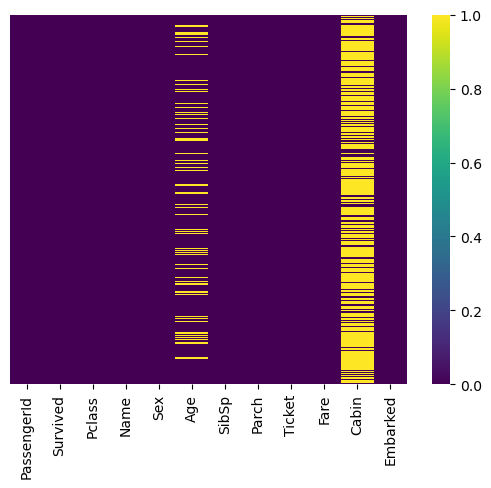

In [7]:
#visualize missing values using heatmap
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap="viridis")

In [11]:
train['Age'].mean()
train['Fare'].mean()


32.204207968574636

The age is missing a percentage of about 20% which can be imputed(replaced)
For the cabin, too much data is missing, it could be dropped or column changed to "Cabin Known:1 or 0"

<Axes: xlabel='Survived', ylabel='count'>

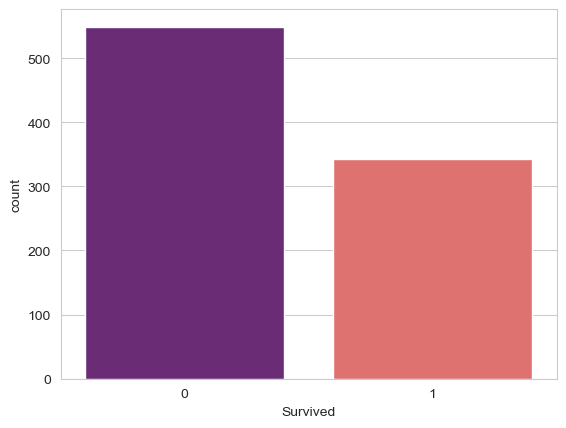

In [12]:
#visualisation continuation
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='magma')

<Axes: xlabel='Survived', ylabel='count'>

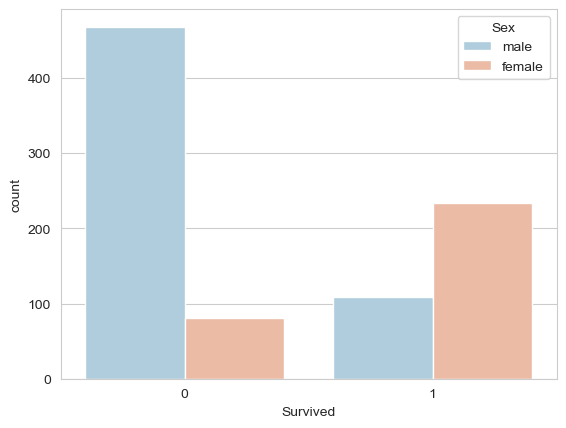

In [14]:
#add hue
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

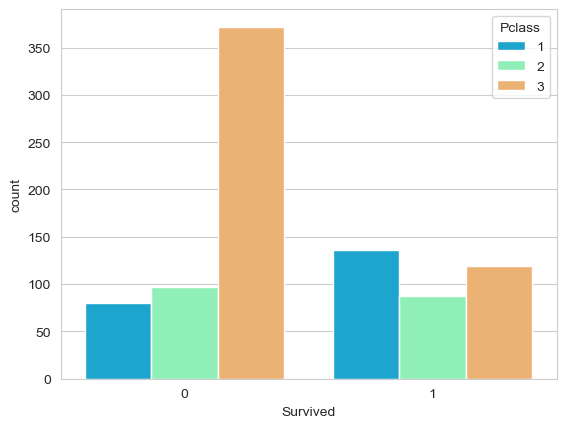

In [16]:
#boxplot
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

C:\Users\User\AppData\Local\Temp\ipykernel_11532\1486099736.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=True,color='darkred',bins=10)


<Axes: xlabel='Age', ylabel='Density'>

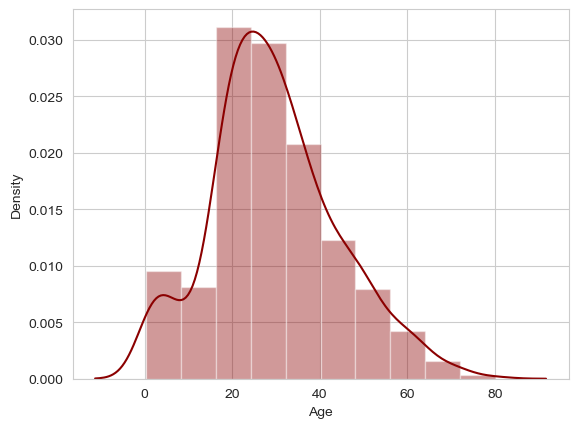

In [17]:
#distribution plot
sns.distplot(train['Age'].dropna(),kde=True,color='darkred',bins=10)

<Axes: >

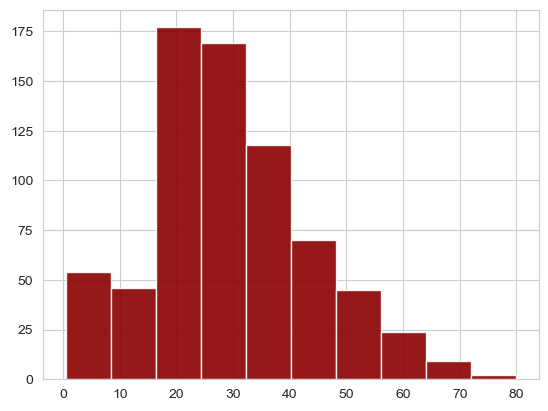

In [19]:
#histogram
train['Age'].hist(bins=10,color='darkred',alpha=0.9)

In [20]:
#siblings
train['SibSp'].mean()

0.5230078563411896

<Axes: xlabel='SibSp', ylabel='count'>

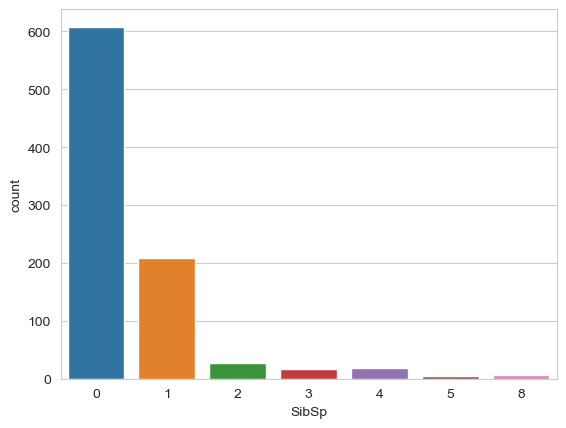

In [21]:
sns.countplot(x='SibSp',data=train)

<Axes: >

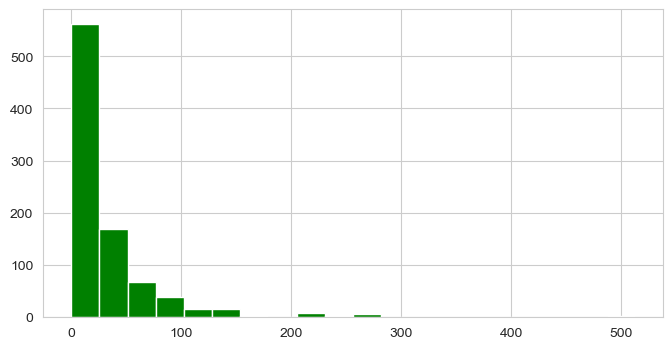

In [24]:
train['Fare'].hist(color='green',bins=20,figsize=(8,4))

# Data Cleaning

We want to fill in missing data, instead of dropping the missing age data rowa. we can do this by filling in the mean age of the passangers(imputation). We can also check average age by passenger class

In [3]:
train['Age'].mean()

29.69911764705882

<Axes: xlabel='Pclass', ylabel='Age'>

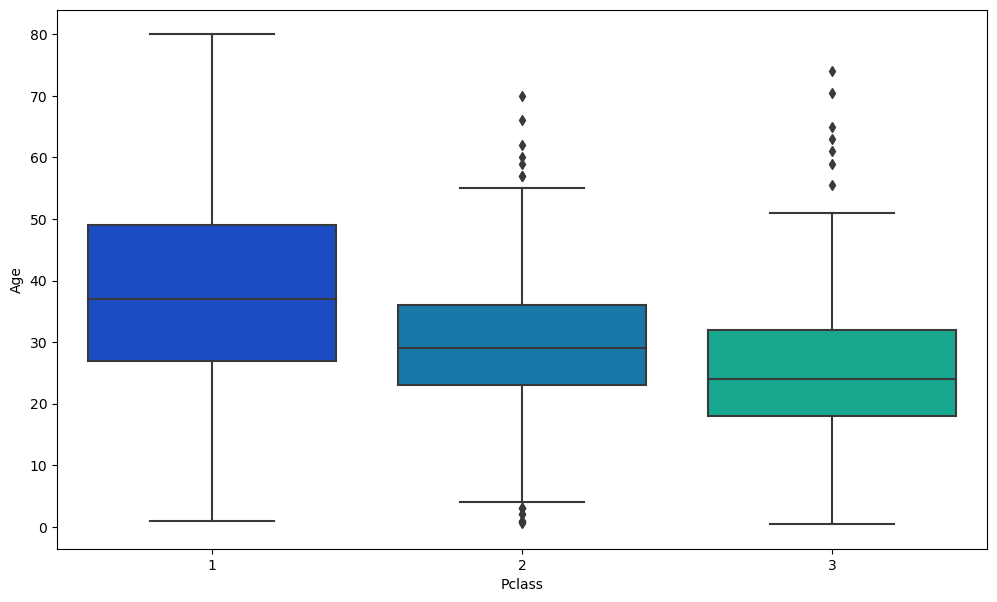

In [4]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

Use average age values to impute based on Pclass and age

In [6]:
#define a function impute_age which will return the mean age based on the Pclass
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else: 
            return 24
        
    else: 
        return Age
    

In [7]:
#apply the function
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [8]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<Axes: >

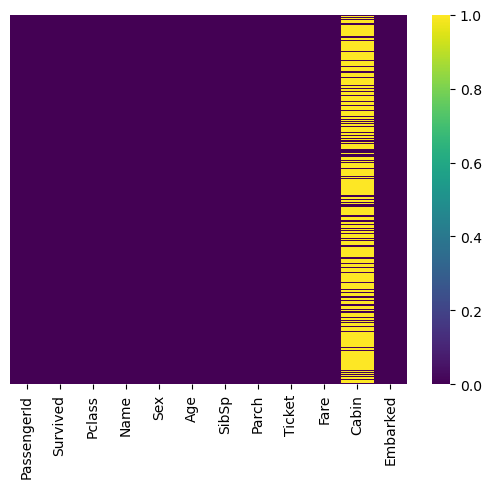

In [9]:
#age now has no missing values
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap="viridis")

Drop cabin column and the row in embarked that is Nan

In [10]:
train.drop('Cabin', axis=1,inplace=True)

<Axes: >

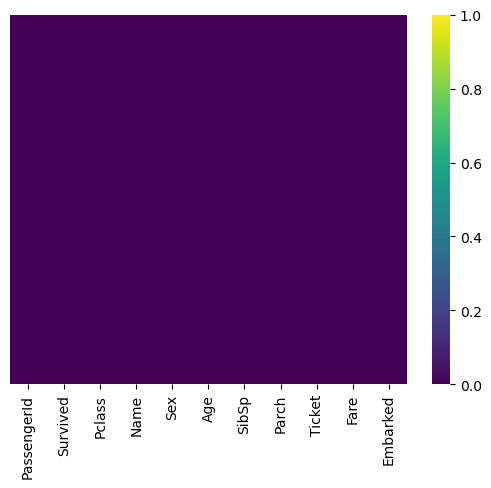

In [11]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap="viridis")

In [12]:
train.dropna(inplace=True)

<Axes: >

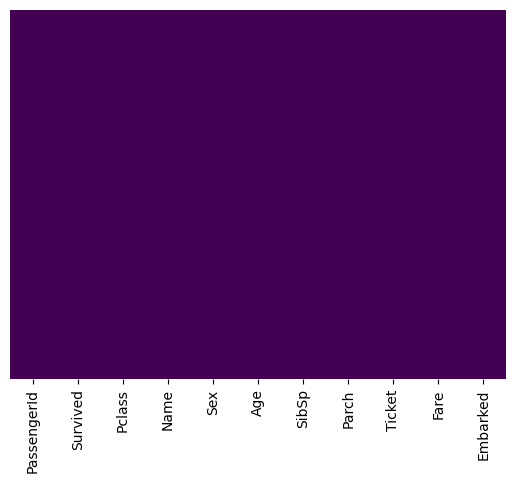

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

# Converting Categorical Features
We need to convert categorical features to dummy variables using pandas to enable our model to directly take in those features as inputs. Convert sex

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [16]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [17]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [18]:
sex.shape

(889, 1)

In [19]:
train.shape

(889, 11)

In [20]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [21]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [23]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [24]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,24.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [26]:
train=pd.concat([train,sex,embark],axis=1)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building a Logistic Regression model
Start by splitting data into a training set anda test set


# Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                    train['Survived'],test_size=0.20,
                                                    random_state=101)

In [31]:
X_train.shape

(711, 9)

In [32]:
y_train.shape

(711,)

y_test.shape

In [34]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
307,308,1,17.0,1,0,108.9000,0,0,0
229,230,3,24.0,3,1,25.4667,0,0,1
82,83,3,24.0,0,0,7.7875,0,1,0
353,354,3,25.0,1,0,17.8000,1,0,1
707,708,1,42.0,0,0,26.2875,1,0,1


In [35]:
y_train.head()

307    1
229    0
82     1
353    0
707    1
Name: Survived, dtype: int64

In [36]:
X_test.shape

(178, 9)

Training and predicting

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
logmodel = LogisticRegression()

In [5]:
logmodel

LogisticRegression()

In [42]:
logmodel.fit(X_train,y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
predictions = logmodel.predict(X_test)

In [44]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

# Model Evaluation

We can check precison, recall,f1score using classification report

In [45]:
from sklearn.metrics import auc,accuracy_score, classification_report, log_loss,confusion_matrix

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       107
           1       0.85      0.65      0.74        71

    accuracy                           0.81       178
   macro avg       0.83      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178



Axes(0.125,0.11;0.62x0.77)


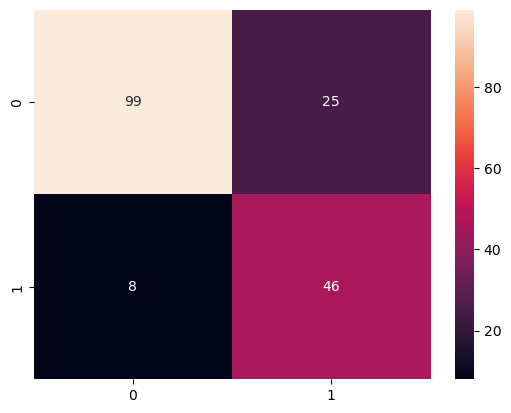

In [47]:
print(sns.heatmap(confusion_matrix(predictions, y_test),annot=True))

In [48]:
pip install scikit-plot

  Obtaining dependency information for scikit-plot from https://files.pythonhosted.org/packages/7c/47/32520e259340c140a4ad27c1b97050dd3254fdc517b1d59974d47037510e/scikit_plot-0.3.7-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [49]:
import scikitplot as skplt

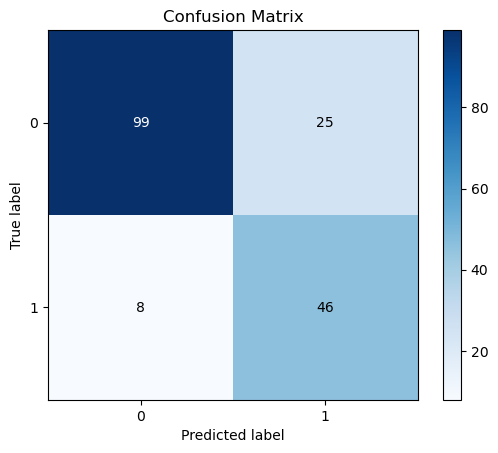

In [50]:
skplt.metrics.plot_confusion_matrix(predictions,y_test)
plt.show()

# Plotting ROC Curve